In [2]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### dataset

In [3]:
test=pd.read_csv("../../sample/6-3-1-logistic-regression.csv")
test.head()

,hours,result
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


### 説明変数を追加

In [183]:
a=stats.norm.rvs(loc=-4,size=25)
b=stats.norm.rvs(loc= 0,size=25)
c=stats.norm.rvs(loc= 4,size=25)
d=stats.norm.rvs(loc= 8,size=25)
x2=np.append(d,[c,b,a])

In [184]:
test2=pd.concat([test,pd.DataFrame(x2)],axis=1)
test2=test2.rename(columns={0:"x2"})
test2.head()

,hours,result,x2
0,0,0,6.752362
1,0,0,6.880539
2,0,0,7.456580
3,0,0,5.290771
4,0,0,7.883587


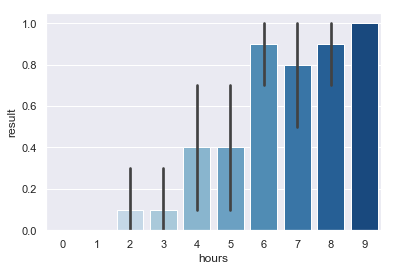

In [185]:
sns.barplot(x="hours",y="result",data=test2,palette="Blues")

In [186]:
test2.groupby("hours").mean()

,result,x2
hours,,
0,0.0,7.560838
1,0.0,8.329101
2,0.1,6.373312
3,0.1,3.938420
4,0.4,4.242706
5,0.4,0.052026
6,0.9,-0.098891
7,0.8,-1.477196
8,0.9,-3.938254


### モデル

In [187]:
mod = smf.glm(formula = "result ~ hours + x2",data=test2,family=sm.families.Binomial()).fit()

In [188]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 result   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -33.488
Date:                Sun, 27 Oct 2019   Deviance:                       66.976
Time:                        14:47:29   Pearson chi2:                     79.5
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.5051      2.206     -2.949      0.003     -10.828      -2.182
hours          1.2668      0.393      3.220      0.001       0.496       2.038
x2             0.2004      0.199      1.009      0.313      -0.189       0.590
==============================================================================
"""

### パラメータ

In [189]:
mod.params

Intercept   -6.505101
hours        1.266802
x2           0.200352
dtype: float64

### 線形予測子に代入

In [190]:
B = mod.params.values
X = np.array([
    np.ones(len(test2)),
    test2.hours.values,
    test2.x2.values
]).T

In [191]:
P=1/(1+sp.exp(-np.dot(X,B)))

### プロット

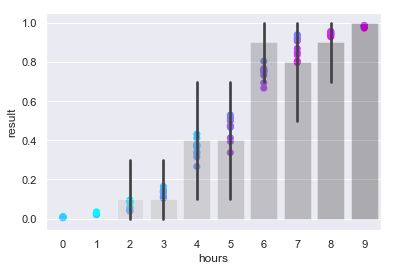

In [192]:
plt.scatter(x=X[:,1],y=P,c=X[:,2],cmap="cool_r")
sns.barplot(x="hours",y="result",data=test2,palette="gray_r",alpha=0.3)

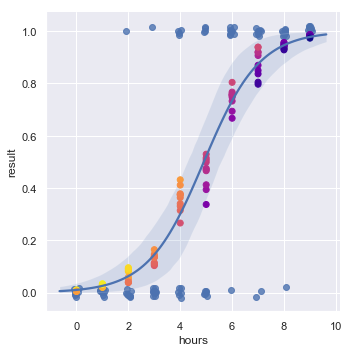

In [193]:
sns.lmplot(x="hours",y="result",data=test2,logistic=True,x_jitter=0.1,y_jitter=0.02)
# plt.plot(X[:,1],P,color="orange")
plt.scatter(x=X[:,1],y=P,c=X[:,2],cmap="plasma")

In [194]:
mod.aic

72.97633913100893

In [195]:
np.dot(X,B)

array([-5.15225431e+00, -5.12657386e+00, -5.01116315e+00, -5.44508659e+00,
       -4.92561147e+00, -4.58142019e+00, -4.76368937e+00, -4.65476865e+00,
       -4.93014397e+00, -5.31203597e+00, -3.43736698e+00, -3.69551113e+00,
       -3.45207367e+00, -3.39143798e+00, -3.84018973e+00, -3.34811500e+00,
       -3.64318967e+00, -3.54412439e+00, -3.90214411e+00, -3.44134926e+00,
       -2.24957740e+00, -2.42842934e+00, -2.37990791e+00, -2.31225621e+00,
       -2.29300525e+00, -3.20756542e+00, -2.93106291e+00, -2.76975870e+00,
       -3.21678719e+00, -3.15759055e+00, -1.76117295e+00, -2.11989377e+00,
       -2.16121055e+00, -2.07568258e+00, -1.85321532e+00, -1.62617399e+00,
       -1.81244246e+00, -2.04428838e+00, -1.83853662e+00, -1.86365433e+00,
       -7.80284082e-01, -7.03978543e-01, -6.62402070e-01, -4.97634314e-01,
       -2.74986040e-01, -5.16889010e-01, -5.60526378e-01, -3.58433034e-01,
       -1.01409225e+00, -5.09384879e-01, -4.30016871e-01, -5.30706678e-03,
       -1.15970729e-01, -

In [196]:
from mpl_toolkits.mplot3d import Axes3D

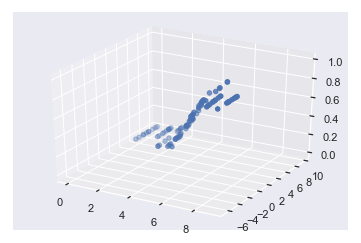

In [197]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,1],X[:,2],P)
plt.show()